[Amirhossein Mahmoudi](https://ammahmoudi.github.io)
# System with stable focus Phase Plane

In [34]:
import numpy as np
from matplotlib import pyplot as plt

In [35]:
def D(t,r,a=-1,b=1): 
    x, y = r
    return np.array([a*x-b*y,  b*x+a*y])   

def D2(x,y,a=-1,b=1): 
    return np.array([a*x-b*y,  b*x+a*y])   


In [36]:
import numpy as np

#initial values
x0, y0,  = 1, 1,
#parameters
a=-1
b=1
#initial time
t0 = 0     
#ending time
tf = 100 
#time step
dt = 0.08 # ... passo

# RK4 Method

In [37]:
def RK4(t, r, f, dt,a=a,b=b):
    k1 = dt*f(t=t,r= r,a=a,b=b)
    k2 = dt*f(t=t + dt/2,r= r + k1/2,a=a,b=b)
    k3 = dt*f(t=t + dt/2, r=r + k2/2,a=a,b=b)
    k4 = dt*f(t=t + dt,r= r + k3,a=a,b=b)
    return r + (k1 + 2*k2 + 2*k3 + k4)/6

In [38]:
def solver(x0,y0,t0,tf,dt,method,**parameters):
    t = np.arange(t0, tf + dt, dt)
    n = len(t)
    result = np.zeros((n, 2))
    result[0]= [x0,y0]
    for i in range(n - 1):
        result[i + 1] = method(t[i], [result[i,0], result[i,1]], D, dt,a=parameters['a'],b=parameters['b'])
    return result

# Results

In [39]:
result=solver(x0,y0,t0,tf,dt,RK4,a=-0.1,b=1)

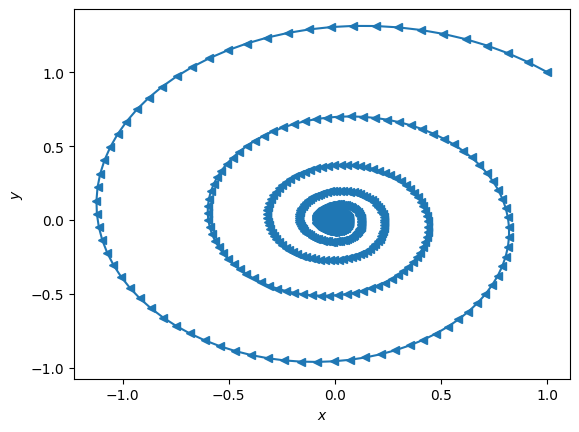

In [40]:
# plot result
# Ds=D2(result[:,0],result[:,1],a=-0.1,b=1)
# plt.streamplot(result[:,0], result[:,1],Ds[:,0],Ds[:,1])
i=0
result=result
plt.plot(result[:,0],result[:,1],'<-',)
# plt.quiver(result[:-1,0], result[:-1,1], result[1:,0]-result[:-1,0], result[1:,1]-result[:-1, 1],)

plt.xlabel('$x$')
plt.ylabel('$y$')
# plt.xlim(left=-0.5,right=0.5)
# plt.ylim(bottom=-0.5,top=0.5)
plt.show()